In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/pakistan_temps_w_time.csv", index_col="date")
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df

,temp,time
date,,
1901-01-15,7.72768,0
1901-02-15,8.93600,1
1901-03-15,16.96320,2
1901-04-15,21.27410,3
1901-05-15,26.04970,4
...,...,...
2016-08-15,27.63320,1387
2016-09-15,26.71790,1388
2016-10-15,22.39820,1389


In [ ]:
def add_fourier_terms(df, period, n_harmonics):
    """
    Adds sine and cosine Fourier terms to a dataframe.
    
    Parameters:
    - df: pandas DataFrame with a time-based index or a 'week_index' column.
    - period: The length of the cycle (12 for monthly data in a year, 52.18 for weekly data).
    - n_harmonics: Number of sine/cosine pairs (K). 
                   1 = smooth cycle, 2+ = captures more complex shapes.
    """
    # Create a time index (1, 2, 3...) if not already present
    #t = np.arange(len(df)) + 1 
    t = df["time"]
    
    for k in range(1, n_harmonics + 1):
        df[f'sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{k}'] = np.cos(2 * np.pi * k * t / period)
        
    return df

In [4]:
add_fourier_terms(df,12,1)
df

,temp,time,sin_1,cos_1
date,,,,
1901-01-15,7.72768,0,0.000000,1.000000e+00
1901-02-15,8.93600,1,0.500000,8.660254e-01
1901-03-15,16.96320,2,0.866025,5.000000e-01
1901-04-15,21.27410,3,1.000000,6.123234e-17
1901-05-15,26.04970,4,0.866025,-5.000000e-01
...,...,...,...,...
2016-08-15,27.63320,1387,-0.500000,-8.660254e-01
2016-09-15,26.71790,1388,-0.866025,-5.000000e-01
2016-10-15,22.39820,1389,-1.000000,-5.144321e-14


In [5]:
from sklearn.linear_model import LinearRegression

# Prepare the features (X) and target (y)
# Use sin_1, cos_1 as features
features = ['sin_1', 'cos_1']
X = df[features]
y = df['temp']

# Fit a quick linear model to see the "combined" Fourier signal
model = LinearRegression()
model.fit(X, y)
df['seasonal_fit'] = model.predict(X)


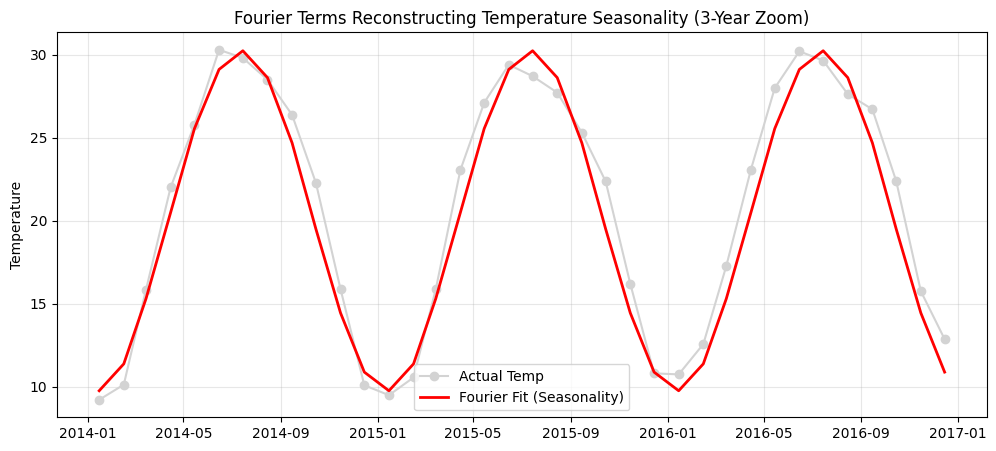

In [6]:

# Plot (Zoom in on 3 years to see the detail)
plt.figure(figsize=(12, 5))
plt.plot(df.index[-36:], df['temp'][-36:], label='Actual Temp', color='lightgray', marker='o')
plt.plot(df.index[-36:], df['seasonal_fit'][-36:], label='Fourier Fit (Seasonality)', color='red', linewidth=2)

plt.title("Fourier Terms Reconstructing Temperature Seasonality (3-Year Zoom)")
plt.ylabel("Temperature")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [7]:
df

,temp,time,sin_1,cos_1,seasonal_fit
date,,,,,
1901-01-15,7.72768,0,0.000000,1.000000e+00,9.767198
1901-02-15,8.93600,1,0.500000,8.660254e-01,11.386854
1901-03-15,16.96320,2,0.866025,5.000000e-01,15.316305
1901-04-15,21.27410,3,1.000000,6.123234e-17,20.502660
1901-05-15,26.04970,4,0.866025,-5.000000e-01,25.556237
...,...,...,...,...,...
2016-08-15,27.63320,1387,-0.500000,-8.660254e-01,28.627405
2016-09-15,26.71790,1388,-0.866025,-5.000000e-01,24.697954
2016-10-15,22.39820,1389,-1.000000,-5.144321e-14,19.511599


In [8]:
df.to_csv("../data/pakistan_temps_w_fourier.csv")